In [6]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset 1 and 2

In [7]:
bill_id = pd.read_csv('bill_id.csv')
print(bill_id.shape)
bill_id.head()


(13600, 3)


,bill_id,patient_id,date_of_admission
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01


In [8]:
bill_amt = pd.read_csv('bill_amount.csv')
print(bill_amt.shape)
bill_amt.head()

(13600, 2)


,bill_id,amount
0,40315104,1552.634830
1,2660045161,1032.011951
2,1148334643,6469.605351
3,3818426276,755.965425
4,9833541918,897.347816


## Merging as both dataset have same number of rows

In [9]:
total = pd.merge(bill_id,bill_amt, on='bill_id')
print(total.shape)
total.head()

(13600, 4)


,bill_id,patient_id,date_of_admission,amount
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01,951.214467
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,19900.297086
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01,12338.269972
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,1145.372193
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01,1133.601902


### Total number of patients

In [10]:
total.patient_id.nunique()

3000

### Individuals patients registered for number of times

In [11]:
total.patient_id.value_counts()

4e46fddfa404b306809c350aecbf0f6a    16
e3270f450ee164e596ca933a25bab61d    12
d15ec3b278e42b36e7362ac783643685    12
f01974d944d1c4b2c40753223fb979fa    12
258807316af4b45fda1b05668d557d06    12
                                    ..
ad22c74612bc8bc17284380872b6c04e     4
80c734c8048ee120d545c0a6e3d28d76     4
3aec0369558b3abf760eaf2e779ab40a     4
07fda6d3d33dd1bdbeb34e17b8962cce     4
751802f6aacd567942e5c67e190e87aa     4
Name: patient_id, Length: 3000, dtype: int64

### Combining the bills for same patients over the time


In [12]:
data1 = total.groupby(['patient_id','date_of_admission']).sum('amount').reset_index()

print(data1.shape)
data1.drop('bill_id',axis=1,inplace=True)
data1

(3400, 4)


,patient_id,date_of_admission,amount
0,00225710a878eff524a1d13be817e8e2,2014-04-10,5190.566695
1,0029d90eb654699c18001c17efb0f129,2012-11-07,22601.497872
2,0040333abd68527ecb53e1db9073f52e,2013-01-19,17447.181635
3,00473b58e3dc8ae37b3cb34069705083,2014-02-10,15285.883220
4,0078662d1d983dde68ea057c42d5b5cf,2012-04-28,73477.869010
...,...,...,...
3395,ffa5a615a4cc5fb1ada0443edc1f5dd3,2011-04-24,4676.066179
3396,ffac3c4b6838f42625e1dd00dd7c867b,2015-11-28,14049.042774
3397,ffc19537fa6621512ef4f296d60896ce,2013-05-05,30053.620971
3398,ffd67c2bcfb32508d2cf7b1e1193e2ed,2012-12-24,28007.636468


### Clinical Data

In [13]:
clinic_data = pd.read_csv('clinical_data.csv')
print(clinic_data.shape)
clinic_data.rename(columns={'id':'patient_id'},inplace=True)
clinic_data.head()


(3400, 26)


,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,...,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,...,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0


### Checking Null Values

In [14]:
clinic_data.isnull().sum()

patient_id              0
date_of_admission       0
date_of_discharge       0
medical_history_1       0
medical_history_2     233
medical_history_3       0
medical_history_4       0
medical_history_5     304
medical_history_6       0
medical_history_7       0
preop_medication_1      0
preop_medication_2      0
preop_medication_3      0
preop_medication_4      0
preop_medication_5      0
preop_medication_6      0
symptom_1               0
symptom_2               0
symptom_3               0
symptom_4               0
symptom_5               0
lab_result_1            0
lab_result_2            0
lab_result_3            0
weight                  0
height                  0
dtype: int64

### Replacing null values with 0 as it is categorical column

In [15]:
clinic_data.fillna(value=0,inplace=True)
clinic_data.isnull().sum()

patient_id            0
date_of_admission     0
date_of_discharge     0
medical_history_1     0
medical_history_2     0
medical_history_3     0
medical_history_4     0
medical_history_5     0
medical_history_6     0
medical_history_7     0
preop_medication_1    0
preop_medication_2    0
preop_medication_3    0
preop_medication_4    0
preop_medication_5    0
preop_medication_6    0
symptom_1             0
symptom_2             0
symptom_3             0
symptom_4             0
symptom_5             0
lab_result_1          0
lab_result_2          0
lab_result_3          0
weight                0
height                0
dtype: int64

### Checking the datatypes of columns

In [16]:
clinic_data.dtypes

patient_id             object
date_of_admission      object
date_of_discharge      object
medical_history_1       int64
medical_history_2     float64
medical_history_3      object
medical_history_4       int64
medical_history_5     float64
medical_history_6       int64
medical_history_7       int64
preop_medication_1      int64
preop_medication_2      int64
preop_medication_3      int64
preop_medication_4      int64
preop_medication_5      int64
preop_medication_6      int64
symptom_1               int64
symptom_2               int64
symptom_3               int64
symptom_4               int64
symptom_5               int64
lab_result_1          float64
lab_result_2          float64
lab_result_3          float64
weight                float64
height                float64
dtype: object

In [17]:
clinic_data.medical_history_3.unique()

array(['0', 'No', '1', 'Yes'], dtype=object)

### Converting all string values to numeric

In [18]:
clinic_data.replace({'0':0,'1':1,'No':0,'Yes':1},inplace=True)

### combining dataframe

In [19]:
main_data = clinic_data.merge(data1,how='inner',left_on=['patient_id','date_of_admission'],right_on=['patient_id','date_of_admission'])
main_data

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,amount
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,0,0,1,1,13.2,30.9,123.0,71.3,161.0,15405.418665
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,0,1,1,1,13.8,22.6,89.0,78.4,160.0,23303.000924
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,1,1,1,0,11.2,26.2,100.0,72.0,151.0,16813.123088
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,0,0,0.0,1,1,...,1,1,1,1,13.3,28.4,76.0,64.4,152.0,27994.878530
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,0,0,0.0,1,1,...,1,0,1,0,12.0,27.8,87.0,55.6,160.0,10707.950907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,4368c266084e640c469a5d41b339805c,2015-12-26,2016-01-07,0,0.0,0,0,0.0,0,0,...,1,0,1,1,13.8,28.6,129.0,79.5,167.0,20730.378614
3396,4f67a54ab205cc9e7e2b0a4ee08e4fba,2015-12-28,2016-01-07,0,0.0,0,0,0.0,1,0,...,1,0,0,1,11.6,27.9,107.0,72.7,155.0,19356.767331
3397,ac52a32f8ce8c46d82df2d72052ae5a9,2015-12-28,2016-01-08,0,0.0,0,0,0.0,1,0,...,1,1,1,1,14.7,25.2,91.0,62.3,154.0,20141.411600
3398,5189c62dfb8e6075b5c7fd4766671bd4,2015-12-26,2016-01-09,0,1.0,0,0,0.0,0,0,...,1,0,1,0,16.9,25.6,92.0,87.3,156.0,10932.663154


### columns to represent number of days patient stayed in hospital

In [20]:
main_data.date_of_admission = pd.to_datetime(main_data.date_of_admission)
main_data.date_of_discharge = pd.to_datetime(clinic_data.date_of_discharge)
diff=  [int(i.days) for i in (main_data.date_of_discharge - main_data.date_of_admission)]
main_data['diff'] = diff

In [24]:
main_data.drop(columns='date_of_discharge',inplace=True)

In [26]:
clinic_data.shape,main_data.shape

((3400, 26), (3400, 27))

### DemoGraphics Dataset

In [27]:
demo = pd.read_csv('demographics.csv')
demo

,patient_id,gender,race,resident_status,date_of_birth
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14
1,5b6477c5de78d0b138e3b0c18e21d0ae,f,Chinese,Singapore citizen,1976-02-18
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15
4,541ad077cb4a0e64cc422673afe28aef,m,Chinese,Singaporean,1970-12-12
...,...,...,...,...,...
2995,0ba769860b060834b8c728ad26137c7f,Female,Malay,PR,1948-01-02
2996,a27a55b92a7afd9cfc427085a2734385,Female,Malay,Singaporean,1942-03-08
2997,c17a0f4c4f3931bed36081fabf501396,Male,Indian,Singaporean,1964-01-02
2998,c5ca8e8bfd744a1ef6f77318bcb591b4,Female,Chinese,Singaporean,1973-04-19


In [28]:
from datetime import date, datetime

demo.date_of_birth = pd.to_datetime(demo.date_of_birth)
today = date.today()
demo['today'] = today
demo.today = pd.to_datetime(demo.today)
age=  [(int(i.days)//356) for i in (demo.today - demo.date_of_birth)]
demo['age'] = age

In [29]:
demo.drop(columns=['today','date_of_birth'],axis=1,inplace=True)

## Data Cleaning

In [30]:
demo.replace({'f':'Female','m':'Male'},inplace = True)
demo.replace({'India':'Indian'},inplace=True)
demo.replace({'chinese':'Chinese'},inplace=True)


### One hot endcoding for categorical Variables

In [31]:
demo['gender'] = pd.get_dummies(demo.gender,drop_first=True)
demo1= pd.get_dummies(demo.race,drop_first=True,prefix='race')
demo2 = pd.get_dummies(demo.resident_status,drop_first=True,prefix='rs')

In [32]:
demo = pd.concat([demo,demo1,demo2],axis=1)
demo

,patient_id,gender,race,resident_status,age,race_Indian,race_Malay,race_Others,rs_PR,rs_Singapore citizen,rs_Singaporean
0,fa2d818b2261e44e30628ad1ac9cc72c,0,Indian,Singaporean,51,1,0,0,0,0,1
1,5b6477c5de78d0b138e3b0c18e21d0ae,0,Chinese,Singapore citizen,46,0,0,0,0,1,0
2,320aa16c61937447fd6631bf635e7fde,1,Chinese,Singapore citizen,39,0,0,0,0,1,0
3,c7f3881684045e6c49020481020fae36,1,Malay,Singapore citizen,75,0,1,0,0,1,0
4,541ad077cb4a0e64cc422673afe28aef,1,Chinese,Singaporean,51,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2995,0ba769860b060834b8c728ad26137c7f,0,Malay,PR,75,0,1,0,1,0,0
2996,a27a55b92a7afd9cfc427085a2734385,0,Malay,Singaporean,81,0,1,0,0,0,1
2997,c17a0f4c4f3931bed36081fabf501396,1,Indian,Singaporean,58,1,0,0,0,0,1
2998,c5ca8e8bfd744a1ef6f77318bcb591b4,0,Chinese,Singaporean,49,0,0,0,0,0,1


In [33]:
demo.drop(columns =['race','resident_status'],axis=1,inplace=True)
demo.head()

,patient_id,gender,age,race_Indian,race_Malay,race_Others,rs_PR,rs_Singapore citizen,rs_Singaporean
0,fa2d818b2261e44e30628ad1ac9cc72c,0,51,1,0,0,0,0,1
1,5b6477c5de78d0b138e3b0c18e21d0ae,0,46,0,0,0,0,1,0
2,320aa16c61937447fd6631bf635e7fde,1,39,0,0,0,0,1,0
3,c7f3881684045e6c49020481020fae36,1,75,0,1,0,0,1,0
4,541ad077cb4a0e64cc422673afe28aef,1,51,0,0,0,0,0,1


## creating Csv for visualization

In [34]:
# vis_data = total.merge(clinic_data,on='patient_id',how = 'inner')
# vis_data = vis_data.merge(demo,on='patient_id',how = 'inner')
# vis_data.to_csv('visualization.csv')

### Creating dataframe for model building

In [35]:
data1

,patient_id,date_of_admission,amount
0,00225710a878eff524a1d13be817e8e2,2014-04-10,5190.566695
1,0029d90eb654699c18001c17efb0f129,2012-11-07,22601.497872
2,0040333abd68527ecb53e1db9073f52e,2013-01-19,17447.181635
3,00473b58e3dc8ae37b3cb34069705083,2014-02-10,15285.883220
4,0078662d1d983dde68ea057c42d5b5cf,2012-04-28,73477.869010
...,...,...,...
3395,ffa5a615a4cc5fb1ada0443edc1f5dd3,2011-04-24,4676.066179
3396,ffac3c4b6838f42625e1dd00dd7c867b,2015-11-28,14049.042774
3397,ffc19537fa6621512ef4f296d60896ce,2013-05-05,30053.620971
3398,ffd67c2bcfb32508d2cf7b1e1193e2ed,2012-12-24,28007.636468


In [31]:
clinic_data.date_of_admission.astype('str')

0       2011-01-01
1       2011-01-01
2       2011-01-02
3       2011-01-02
4       2011-01-08
           ...    
3395    2015-12-26
3396    2015-12-28
3397    2015-12-28
3398    2015-12-26
3399    2015-12-28
Name: date_of_admission, Length: 3400, dtype: object

In [36]:
main_data

,patient_id,date_of_admission,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,...,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,amount,diff
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,...,0,1,1,13.2,30.9,123.0,71.3,161.0,15405.418665,10
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,0,0.0,0,0,0.0,0,0,0,...,1,1,1,13.8,22.6,89.0,78.4,160.0,23303.000924,10
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,0,0.0,0,0,0.0,0,0,0,...,1,1,0,11.2,26.2,100.0,72.0,151.0,16813.123088,11
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,0,1.0,0,0,0.0,1,1,1,...,1,1,1,13.3,28.4,76.0,64.4,152.0,27994.878530,12
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,0,0.0,0,0,0.0,1,1,0,...,0,1,0,12.0,27.8,87.0,55.6,160.0,10707.950907,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,4368c266084e640c469a5d41b339805c,2015-12-26,0,0.0,0,0,0.0,0,0,0,...,0,1,1,13.8,28.6,129.0,79.5,167.0,20730.378614,12
3396,4f67a54ab205cc9e7e2b0a4ee08e4fba,2015-12-28,0,0.0,0,0,0.0,1,0,1,...,0,0,1,11.6,27.9,107.0,72.7,155.0,19356.767331,10
3397,ac52a32f8ce8c46d82df2d72052ae5a9,2015-12-28,0,0.0,0,0,0.0,1,0,0,...,1,1,1,14.7,25.2,91.0,62.3,154.0,20141.411600,11
3398,5189c62dfb8e6075b5c7fd4766671bd4,2015-12-26,0,1.0,0,0,0.0,0,0,0,...,0,1,0,16.9,25.6,92.0,87.3,156.0,10932.663154,14


In [37]:
main_data = main_data.merge(demo,how='inner',on='patient_id')

In [38]:
main_data

,patient_id,date_of_admission,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,...,amount,diff,gender,age,race_Indian,race_Malay,race_Others,rs_PR,rs_Singapore citizen,rs_Singaporean
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,...,15405.418665,10,1,45,1,0,0,0,0,1
1,1d21f2be18683991eb93d182d6b2d220,2015-09-17,0,0.0,0,0,0.0,0,1,1,...,19899.581704,13,1,45,1,0,0,0,0,1
2,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,0,0.0,0,0,0.0,0,0,0,...,23303.000924,10,0,43,0,1,0,0,0,1
3,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,0,0.0,0,0,0.0,0,0,0,...,16813.123088,11,0,55,1,0,0,0,0,1
4,c85cf97bc6307ded0dd4fef8bad2fa09,2014-03-20,1,0.0,1,0,0.0,1,0,1,...,27268.686199,6,0,55,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,3f052a68d7c25d817a63aa1ba70f4dc2,2015-12-21,0,0.0,0,0,0.0,0,0,1,...,25040.612435,16,0,79,0,0,0,0,0,1
3396,4f67a54ab205cc9e7e2b0a4ee08e4fba,2015-12-28,0,0.0,0,0,0.0,1,0,1,...,19356.767331,10,0,52,0,0,0,0,0,1
3397,ac52a32f8ce8c46d82df2d72052ae5a9,2015-12-28,0,0.0,0,0,0.0,1,0,0,...,20141.411600,11,0,43,0,0,0,0,1,0
3398,5189c62dfb8e6075b5c7fd4766671bd4,2015-12-26,0,1.0,0,0,0.0,0,0,0,...,10932.663154,14,0,62,0,0,0,0,0,1


In [39]:
(main_data.dtypes)

patient_id                      object
date_of_admission       datetime64[ns]
medical_history_1                int64
medical_history_2              float64
medical_history_3                int64
medical_history_4                int64
medical_history_5              float64
medical_history_6                int64
medical_history_7                int64
preop_medication_1               int64
preop_medication_2               int64
preop_medication_3               int64
preop_medication_4               int64
preop_medication_5               int64
preop_medication_6               int64
symptom_1                        int64
symptom_2                        int64
symptom_3                        int64
symptom_4                        int64
symptom_5                        int64
lab_result_1                   float64
lab_result_2                   float64
lab_result_3                   float64
weight                         float64
height                         float64
amount                   

### Excluding  object datatype as it is not required for model building

In [61]:
main_data = main_data.select_dtypes(exclude=['object','datetime64[ns]'])
main_data

,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,...,amount,diff,gender,age,race_Indian,race_Malay,race_Others,rs_PR,rs_Singapore citizen,rs_Singaporean
0,0,1.0,0,0,0.0,0,0,1,0,1,...,15405.418665,10,1,45,1,0,0,0,0,1
1,0,0.0,0,0,0.0,0,1,1,1,1,...,19899.581704,13,1,45,1,0,0,0,0,1
2,0,0.0,0,0,0.0,0,0,0,1,1,...,23303.000924,10,0,43,0,1,0,0,0,1
3,0,0.0,0,0,0.0,0,0,0,1,1,...,16813.123088,11,0,55,1,0,0,0,0,1
4,1,0.0,1,0,0.0,1,0,1,0,1,...,27268.686199,6,0,55,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,0,0.0,0,0,0.0,0,0,1,0,1,...,25040.612435,16,0,79,0,0,0,0,0,1
3396,0,0.0,0,0,0.0,1,0,1,1,1,...,19356.767331,10,0,52,0,0,0,0,0,1
3397,0,0.0,0,0,0.0,1,0,0,1,1,...,20141.411600,11,0,43,0,0,0,0,1,0
3398,0,1.0,0,0,0.0,0,0,0,1,0,...,10932.663154,14,0,62,0,0,0,0,0,1


### Bill_id is not required

In [56]:
#data.drop(columns='bill_id',axis=1,inplace=True)
main_data.head()
len(main_data.columns)

33

### Creating Dependent and Independent variable

In [110]:
X = main_data.drop('amount',axis=1)
y = main_data['amount']

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [78]:
X_train.dtypes

medical_history_1         int64
medical_history_2       float64
medical_history_3         int64
medical_history_4         int64
medical_history_5       float64
medical_history_6         int64
medical_history_7         int64
preop_medication_1        int64
preop_medication_2        int64
preop_medication_3        int64
preop_medication_4        int64
preop_medication_5        int64
preop_medication_6        int64
symptom_1                 int64
symptom_2                 int64
symptom_3                 int64
symptom_4                 int64
symptom_5                 int64
lab_result_1            float64
lab_result_2            float64
lab_result_3            float64
weight                  float64
height                  float64
diff                      int64
gender                    uint8
age                       int64
race_Indian               uint8
race_Malay                uint8
race_Others               uint8
rs_PR                     uint8
rs_Singapore citizen      uint8
rs_Singa

## Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)


0.9306959180513804

## Scaling values

In [82]:
cols = ['weight','height','lab_result_1','lab_result_2','lab_result_3']
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
for i in X[['lab_result_1','lab_result_2','lab_result_3','weight','height']]:
    ss = X[i].values.reshape(-1,1)
    features = scale.fit_transform(ss)
    X[i] = features

In [83]:
X

,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,...,height,diff,gender,age,race_Indian,race_Malay,race_Others,rs_PR,rs_Singapore citizen,rs_Singaporean
0,0,1.0,0,0,0.0,0,0,1,0,1,...,-0.585776,10,1,45,1,0,0,0,0,1
1,0,0.0,0,0,0.0,0,1,1,1,1,...,-0.585776,13,1,45,1,0,0,0,0,1
2,0,0.0,0,0,0.0,0,0,0,1,1,...,-0.729193,10,0,43,0,1,0,0,0,1
3,0,0.0,0,0,0.0,0,0,0,1,1,...,-2.019951,11,0,55,1,0,0,0,0,1
4,1,0.0,1,0,0.0,1,0,1,0,1,...,-2.019951,6,0,55,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,0,0.0,0,0,0.0,0,0,1,0,1,...,-0.442358,16,0,79,0,0,0,0,0,1
3396,0,0.0,0,0,0.0,1,0,1,1,1,...,-1.446281,10,0,52,0,0,0,0,0,1
3397,0,0.0,0,0,0.0,1,0,0,1,1,...,-1.589698,11,0,43,0,0,0,0,1,0
3398,0,1.0,0,0,0.0,0,0,0,1,0,...,-1.302863,14,0,62,0,0,0,0,0,1


In [84]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9306959180513804

### Random Forest

0.844167984455549


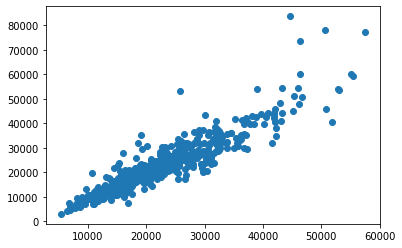

In [85]:
from sklearn.ensemble import RandomForestRegressor
rf_f = RandomForestRegressor(n_estimators=100)
rf_f.fit(X_train,y_train)
y_pred = rf_f.predict(X_test)
print(rf_f.score(X_test,y_test))
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_test)

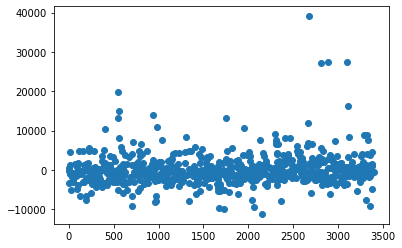

In [86]:
plt.plot(y_test-y_pred,marker='o',linestyle='')

## K nearest Neighbors

In [87]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 2585.22
Mean squared error = 17189669.36
Median absolute error = 1720.73
Explain variance score = 0.84
R2 score = 0.84


In [88]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(ridge, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 1809.453 (260.508)


In [89]:
y_pred = ridge.predict(X_test)
#y_test,y_pred
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

7672443.202527995
2769.9175443554263


### Decision Tree

In [90]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
corr_matrix = np.corrcoef(y_test, y_pred)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

33978020.120932266
5829.066831057289
0.7012742215832483


### Random Forest

In [91]:
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(X_train, y_train)
predict_train = model_RFR.predict(X_train)
predict_test  = model_RFR.predict(X_test)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))
corr_matrix = np.corrcoef(y_test, predict_test)
corr = corr_matrix[0,1]
R_sq = corr**2
print(R_sq)

RMSE on train data:  1971.6297643516525
RMSE on test data:  4088.3258727187954
0.8584168821355017


### Important Features

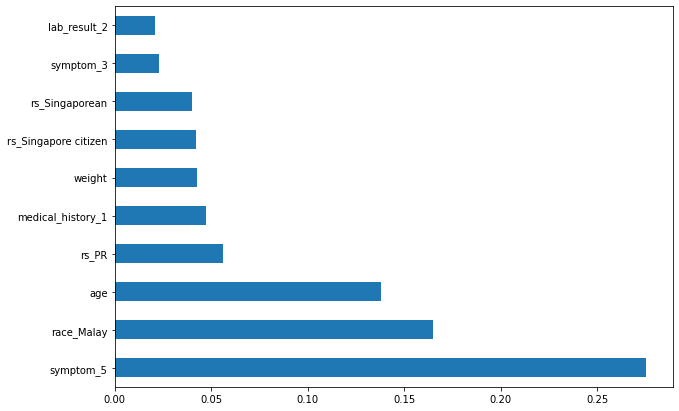

In [92]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = X_train.columns)
feat_importances.nlargest(10).plot(kind='barh');

In [93]:
feat_importances.nlargest(7).index

Index(['symptom_5', 'race_Malay', 'age', 'rs_PR', 'medical_history_1',
       'weight', 'rs_Singapore citizen'],
      dtype='object')

In [94]:
X_imp_features = X[['symptom_5', 'race_Malay', 'age', 'rs_PR', 'medical_history_1',
       'weight', 'rs_Singapore citizen']]
X_train_im , X_test_im, y_train_im, y_test_im = train_test_split(X_imp_features, y, test_size=0.2, random_state=12)



### Checking model with 7 features

In [95]:
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(X_train_im, y_train_im)

predict_train = model_RFR.predict(X_train_im)
predict_test  = model_RFR.predict(X_test_im)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(y_train_im, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test_im, predict_test)**(0.5))

RMSE on train data:  4101.231558075549
RMSE on test data:  6589.18437264334


In [97]:
model_RFR = KNeighborsRegressor(n_neighbors=23)

# fit the model with the training data
model_RFR.fit(X_train_im, y_train_im)

predict_train = model_RFR.predict(X_train_im)
predict_test  = model_RFR.predict(X_test_im)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(y_train_im, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test_im, predict_test)**(0.5))
corr_matrix = np.corrcoef(y_test_im, predict_test)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

RMSE on train data:  7399.488200599733
RMSE on test data:  7096.694251970591
0.4867680553308039


In [98]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

model_RFR = Lasso()

# fit the model with the training data
model_RFR.fit(X_train_im, y_train_im)

predict_train = model_RFR.predict(X_train_im)
predict_test  = model_RFR.predict(X_test_im)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(y_train_im, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test_im, predict_test)**(0.5))
corr_matrix = np.corrcoef(y_test_im, predict_test)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

RMSE on train data:  6417.0118008083045
RMSE on test data:  5971.602981809204
0.6172165964533514


In [99]:
model_RFR = ElasticNet()

# fit the model with the training data
model_RFR.fit(X_train_im, y_train_im)

predict_train = model_RFR.predict(X_train_im)
predict_test  = model_RFR.predict(X_test_im)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(y_train_im, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test_im, predict_test)**(0.5))
corr_matrix = np.corrcoef(y_test_im, predict_test)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

RMSE on train data:  8183.714942516179
RMSE on test data:  7557.172524904186
0.4549862773446582


### Linear Regression Feature importance

Feature: 0, Score: 5945.94699
Feature: 5, Score: 3445.12630
Feature: 13, Score: 2636.33176
Feature: 14, Score: 3521.87523
Feature: 15, Score: 3935.45210
Feature: 16, Score: 3070.69905
Feature: 17, Score: 10284.28901
Feature: 26, Score: 3911.33466
Feature: 27, Score: 10440.90747
Feature: 28, Score: 2211.26162


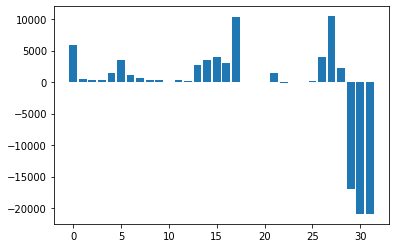

In [100]:
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    if v> 2000:
        print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [103]:
from xgboost import XGBRegressor
model_RFR = XGBRegressor()

# fit the model with the training data
model_RFR.fit(X_train,y_train)

predict_train = model_RFR.predict(X_train)
predict_test  = model_RFR.predict(X_test)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))
corr_matrix = np.corrcoef(y_test, predict_test)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

RMSE on train data:  273.2970134640403
RMSE on test data:  2635.5123478383907
0.940223339271908


In [106]:
model_RFR.feature_importances_ > 0.1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False])

In [108]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [109]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [111]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [113]:
def evaluate(model, X_train, y_train):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 2799.5782 degrees.
Accuracy = 86.01%.
Model Performance
Average Error: 2559.9412 degrees.
Accuracy = 87.57%.
Improvement of 1.80%.
